In [1]:
!pip install git+https://github.com/georgegee23/Alphalytics.py

import alphalytics as alpha
print(dir(alpha))

  Running command git clone --filter=blob:none --quiet https://github.com/georgegee23/Alphalytics.py 'C:\Users\george.georgiev\AppData\Local\Temp\pip-req-build-7ugxp7ts'


  Cloning https://github.com/georgegee23/Alphalytics.py to c:\users\george.georgiev\appdata\local\temp\pip-req-build-7ugxp7ts
  Resolved https://github.com/georgegee23/Alphalytics.py to commit 80b71593dc1a38ffaf8c44f88960d50cc5c9a19a
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'calculate_autocorrelation', 'compute_capm', 'compute_cumulative_growth', 'compute_factor_autocorr', 'compute_forward_returns', 'compute_mean_quantile_forward_return', 'compute_performance_table', 'compute_quantile_returns', 'compute_quantile_turnover', 'compute_quantiles_turnover', 'comput

In [2]:
print(dir(alpha))


['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'calculate_autocorrelation', 'compute_capm', 'compute_cumulative_growth', 'compute_factor_autocorr', 'compute_forward_returns', 'compute_mean_quantile_forward_return', 'compute_performance_table', 'compute_quantile_returns', 'compute_quantile_turnover', 'compute_quantiles_turnover', 'compute_spearman_stats', 'cross_sectional_spearmanr', 'detect_extreme_outliers', 'dist_name', 'factor_decay', 'fwd_quantile_stats', 'get_quantile_holdings', 'ic_analysis', 'performance_metrics', 'plot_cumulative_performance', 'plot_factor_data', 'plot_factor_decay', 'plot_forward_returns', 'plot_ic_hist', 'plot_ic_summary', 'plot_quantile_correlations', 'plot_quantiles_annual_turnover', 'plot_quantiles_risk_metrics', 'plot_spearman_rank', 'plotting', 'qqplot_ic', 'quantile_analysis', 'sys', 'to_quantiles', 'turnover_analysis', 'utils']


In [3]:
import pandas as pd

In [4]:
periods_per_year = 52

OUTLINE:

1. Factor Scores Analysis. 
    - Factor Scores Distribution: How the factors behave?
2. Quantile Performance Analysis:
    - Quantile Analyis: How have the factors quantiles performed historically? 
        - Quantiles Performance Summary.
        - Quantiles Risk & Return Statistics.
    - Quantile Correlation Analysis: How strong is the relationship between the different quantiles?  
3. Prediction Analysis:
    - Factor & Return Rank Correlation Analysis: Are factor scores and future returns correlated?
    - Factor Information Decay: How factor scores and returns correlated into the future?
    - Quantile Horizon Analysis: How far forward is the factor quantiles additive to performance? 
4. Turnover Analysis:
    - Autocorrelation: How correlated are current factor scores to future factor scores?
    - Temporal Volatility of Factor Quantiles: How volatile are factor quantiles through time?


#### PREPARE DATA

In [5]:
data_loc = "E:\\GG\\QuantLibs\\Data\\"
returns = pd.read_excel(data_loc+"202503_FactSet_Rets_10Y.xlsx", sheet_name="Values", index_col=0, parse_dates=True)
returns = returns.resample("W").last()
returns = returns / 100 # convert to %
prices = (returns + 1).cumprod()
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2015-03-08 to 2025-03-02
Freq: W-SUN
Columns: 580 entries, 00090Q103 to Y8162K204
dtypes: float64(580)
memory usage: 2.3 MB


REMOVE OUTLIERS

In [6]:
cols_to_drop = alpha.detect_extreme_outliers(returns)
returns = returns.drop(columns = cols_to_drop)

CREATE FACTORS

In [7]:
ramom = returns.rolling(52).mean() / returns.rolling(52).std()

## FACTOR SCORE ANALYSIS

array([<Axes: title={'center': 'Mean Factor Value & Distribution'}>,
       <Axes: >], dtype=object)

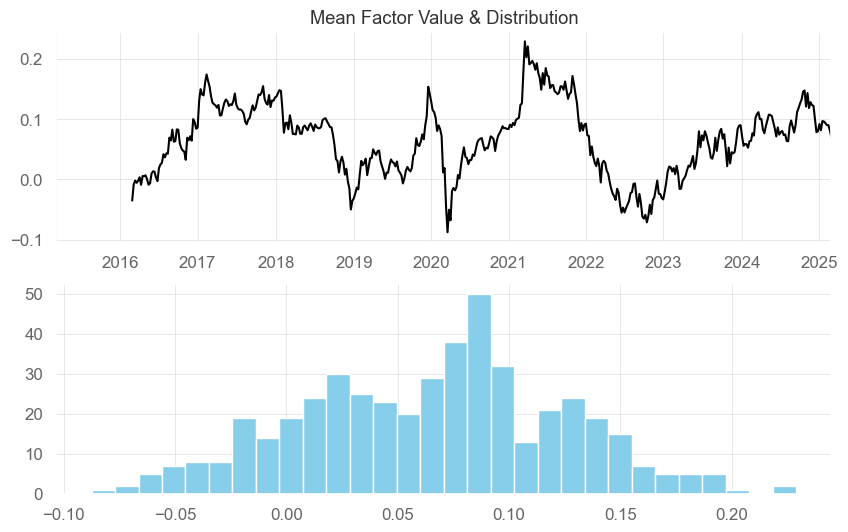

In [8]:
alpha.plot_factor_data(ramom)

NORMALIZE FACTOR VALUES

In [9]:
# Rank factors into percentile by row (cross sectional)
factors = ramom.rank(axis =1, pct=True) 

## QUANTILE PERFORMANCE ANALYSIS

In [10]:
quantiles = alpha.to_quantiles(factors, 10)
quantiles

,00090Q103,002824100,00287Y109,00326A104,00486H105,00534A102,00724F101,007903107,008492100,009066101,...,M98068105,N00985106,N53745100,N62509109,N82405106,N97284108,V7780T103,Y2573F102,Y2685T131,Y8162K204
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-02,8.0,6.0,4.0,10.0,8.0,1.0,1.0,1.0,8.0,1.0,...,8.0,6.0,1.0,2.0,1.0,5.0,10.0,8.0,2.0,1.0
2025-02-09,7.0,6.0,4.0,10.0,9.0,8.0,1.0,1.0,8.0,1.0,...,6.0,8.0,1.0,1.0,1.0,7.0,10.0,8.0,2.0,1.0
2025-02-16,7.0,6.0,4.0,10.0,9.0,8.0,1.0,1.0,8.0,4.0,...,7.0,9.0,1.0,1.0,1.0,8.0,10.0,7.0,2.0,1.0


In [11]:
quantile_returns = alpha.compute_quantile_returns(quantiles, returns, 1)
quantile_returns

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
Date,,,,,,,,,,
2016-03-06,0.132476,0.108737,0.060909,0.050622,0.042130,0.031719,0.032016,0.028406,0.010212,0.003465
2016-03-13,0.011939,0.009627,0.008843,0.010510,0.002787,0.011629,0.008835,0.005432,0.009508,0.002805
2016-03-20,0.008454,0.016245,0.022961,0.035478,0.019973,0.016467,0.011599,0.016182,0.021441,0.011435
2016-03-27,-0.020545,-0.026270,-0.021662,-0.020364,-0.012491,-0.014955,-0.016308,-0.013519,-0.010808,-0.006813
2016-04-03,0.024410,0.017906,0.018355,0.018991,0.016687,0.022853,0.018780,0.018340,0.026298,0.020969
...,...,...,...,...,...,...,...,...,...,...
2025-02-02,-0.005839,-0.002358,-0.014095,0.004423,-0.010082,-0.021230,-0.015542,-0.028404,-0.023662,-0.016398
2025-02-09,0.062386,-0.013033,-0.015292,-0.017863,0.020340,0.004496,0.007860,0.001688,0.018358,0.012052
2025-02-16,0.013321,0.011477,0.015432,-0.000878,0.007342,0.003271,0.012779,0.013169,0.008800,0.012047


#### QUANTILE PERFORMANCE SUMMARY

In [12]:
alpha.compute_performance_table(quantile_returns, periods_per_year=periods_per_year)

,3M,6M,1-Year,3-Year,5-Year,10-Year,SI
Q1,0.114267,0.316731,0.359261,0.281807,0.331118,0.276776,0.273836
Q2,-0.038913,0.054966,0.137352,0.090932,0.136028,0.122885,0.119475
Q3,0.008604,0.101303,0.201888,0.089089,0.117944,0.106246,0.102404
Q4,-0.013099,0.055352,0.115811,0.060047,0.088191,0.086693,0.084406
Q5,0.105396,0.203835,0.273225,0.101556,0.135854,0.120164,0.119438
Q6,0.148249,0.347924,0.288154,0.173324,0.178781,0.120163,0.117948
Q7,-0.034004,0.032928,0.127758,0.113904,0.159510,0.119847,0.118180
Q8,0.025416,0.218420,0.238874,0.118816,0.177442,0.128265,0.124678
Q9,0.016239,0.111666,0.126881,0.094951,0.136977,0.117320,0.116297
Q10,-0.012965,0.082151,0.076934,-0.008502,0.065318,0.045482,0.044109


#### QUANTILE RISK & RETURN STATISTICS

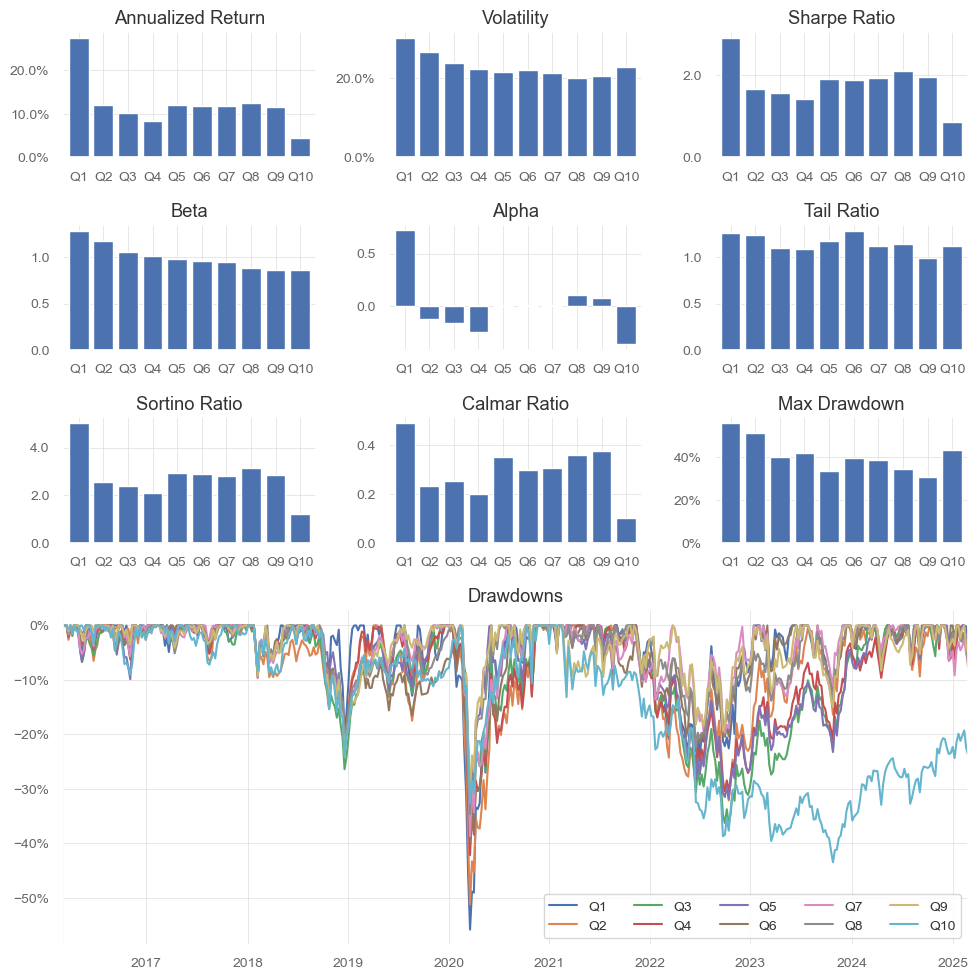

In [13]:
alpha.plot_quantiles_risk_metrics(quantile_returns, periods_per_year=52)

Quantiles are created taking the daily factor values distribution and split it into equal-sized buckets based on their values. The idea behind quantiles is that grouping stocks helps to increase the signal-to-noise ratio.

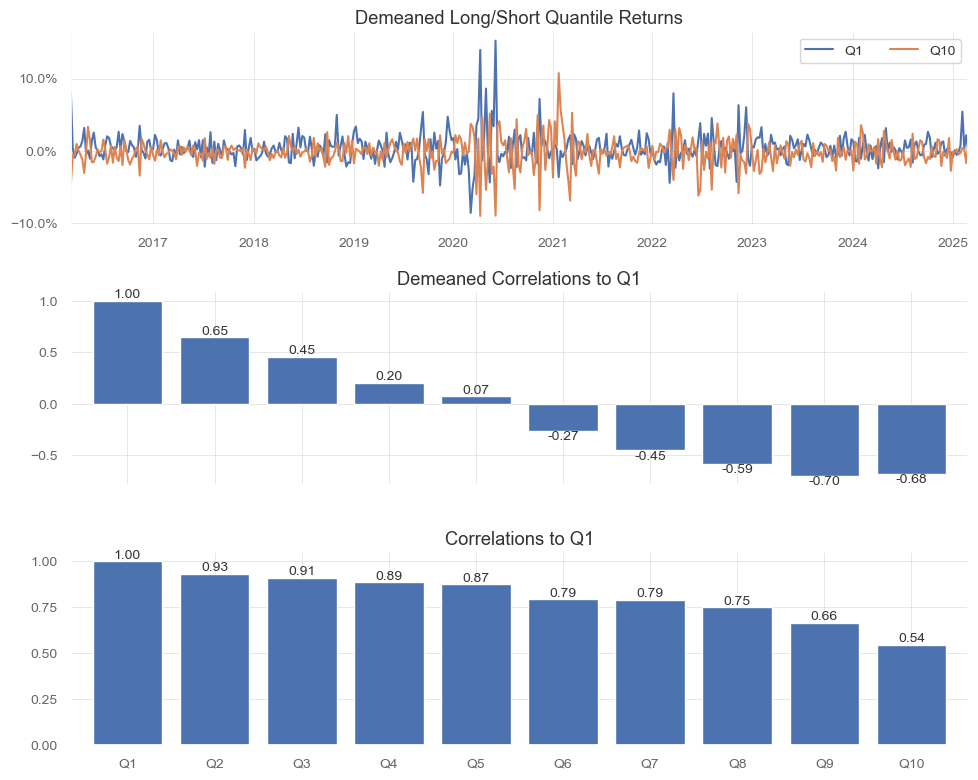

In [14]:
alpha.plot_quantile_correlations(quantile_returns)

## PREDICTIVE ANALYSIS

#### INFORMATION COEFFICIENT ANALYSIS


Non-parametric approaches to measure the statistical significance of a factor's Information Coefficient (IC)
- Wilcoxon Signed-Rank Test
- Sign Test

Wilcoxon Signed-Rank Test

- Tests whether the median of the IC time series is significantly different from zero. It ranks the absolute differences between IC values and zero, considering the sign of the differences.

- Suitability: Appropriate when ICs are not normally distributed but are symmetric or mildly skewed. It’s robust to outliers.

- Interpretation: A small p-value (<0.05) indicates the median IC is significantly different from zero, suggesting the factor has predictive power.

- Limitations: Assumes symmetry in the IC distribution and may have lower power for small samples.

In [16]:
csp = alpha.cross_sectional_spearmanr(factors, returns)

In [18]:
from scipy.stats import wilcoxon
ic_series = csp["SpearmanR"]
stat, p_value = wilcoxon(ic_series, alternative="two-sided")
stat, p_value

(np.float64(16680.0), np.float64(1.467304951836832e-39))

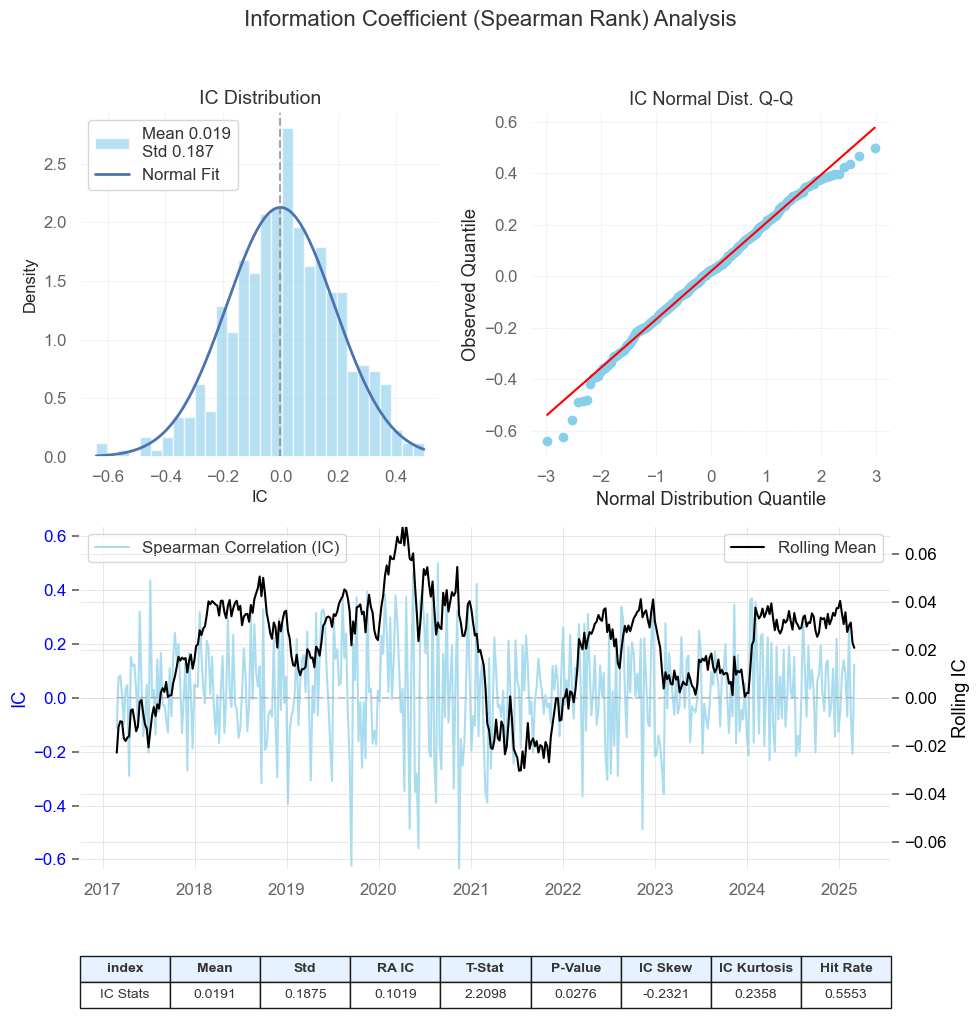

(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: title={'center': 'IC Distribution'}, xlabel='IC', ylabel='Density'>,
        <Axes: title={'center': 'IC Normal Dist. Q-Q'}, xlabel='Normal Distribution Quantile', ylabel='Observed Quantile'>,
        <Axes: ylabel='IC'>], dtype=object))

In [16]:
alpha.plot_ic_summary(factors, returns, window=52, factor_lag=1, periods_label="Weeks")

In [26]:
from scipy.stats import spearmanr, wilcoxon, binomtest, t, ttest_1samp, skew, kurtosis
import numpy as np

def compute_spearman_stats(factors: pd.DataFrame, returns: pd.DataFrame, 
                          factor_lag: int = 0) -> pd.DataFrame:
    """
    Compute Spearman rank correlation statistics between lagged factors and returns.
    
    This function calculates various statistical measures based on the time-series of 
    cross-sectional Spearman rank correlations (Information Coefficients) between factors 
    and subsequent returns. These statistics help evaluate the predictive power and 
    consistency of factors for financial returns.
    
    Parameters
    ----------
    factors : pd.DataFrame
        DataFrame containing factor values. Each column represents a factor and each row
        represents a time period. The index should be time-based.
    
    returns : pd.DataFrame
        DataFrame containing return values. Each column represents an asset's returns and 
        each row represents a time period. Must have the same index as `factors`.
    
    lag : int, optional
        Number of periods to lag the factors by. Default is 1.
        
    
    Returns
    -------
    pd.DataFrame or tuple
        If return_ts is False, returns a DataFrame containing the following statistics:
        - Mean: Average Information Coefficient (IC)
        - Std: Standard deviation of IC
        - RA IC: Risk-adjusted IC (Mean/Std)
        - T-Stat: T-statistic of IC
        - P-Value: Two-sided p-value
        - IC Skew: Skewness of IC distribution
        - IC Kurtosis: Kurtosis of IC distribution
        - Hit Rate: Percentage of periods with positive IC
        
    Return: Spearman Statistics DataFrame
    
    Notes
    -----
    - Factors are lagged to ensure predictive calculations avoid look-ahead bias.
    - The function requires the `cross_sectional_spearmanr` function to calculate 
      correlations at each time step.
    - NaN values in the correlation time series are dropped before statistics are computed.
    """
    # Input validation
    if not isinstance(factors, pd.DataFrame) or not isinstance(returns, pd.DataFrame):
        raise TypeError("Both factors and returns must be pandas DataFrames")
        
    if not factors.index.equals(returns.index):
        raise ValueError("Factors and returns must have the same index")
        
    if factors.empty or returns.empty:
        raise ValueError("Input DataFrames cannot be empty")
    
    # Calculate cross-sectional Spearman rank correlations at each time step
    ts_spearmanr_df = alpha.cross_sectional_spearmanr(factors, returns, factor_lag=factor_lag).dropna()
    
    if ts_spearmanr_df.empty:
        raise ValueError("No valid data points after computing correlations and removing NaNs")

    # Calculate statistics from the time series of correlations
    ic_series = ts_spearmanr_df["SpearmanR"]
    sample_size = len(ic_series)
    
    mean_corr = ic_series.mean()
    std_corr = ic_series.std()
    
    # Avoid division by zero
    raic = mean_corr / std_corr if std_corr != 0 else np.nan
    t_stat = mean_corr / (std_corr / np.sqrt(sample_size)) if std_corr != 0 else np.nan
    t_pval = 2 * (1 - t.cdf(abs(t_stat), sample_size - 1)) if not np.isnan(t_stat) else np.nan

    # Wilcoxon Signed-Rank Test
    if sample_size > 0 and not all(ic_series == 0):  # Check for non-zero ICs
        w_stat, wilcoxon_pval = wilcoxon(ic_series, alternative="two-sided", zero_method="wilcox")
    else:
        w_stat, wilcoxon_pval = np.nan, np.nan
    
    ic_skew = skew(ic_series)
    ic_kurtosis = kurtosis(ic_series)

    n_positive = (ic_series > 0).sum()
    n_total = len(ic_series.dropna())
    sign_pval = binomtest(n_positive, n_total, p=0.5, alternative="two-sided").pvalue
    hit_rate = (ic_series > 0).mean()  # Percentage of positive ICs
    
    # Create dictionary to store results
    spearman_stats_dict = {
        "IC Stats": [
            mean_corr, 
            std_corr,
            raic,
            ic_skew,
            ic_kurtosis,
            t_pval,
            wilcoxon_pval,
            sign_pval,
            hit_rate
        ]
    }

    # Create DataFrame with statistics
    col_names = ["Mean", "Std", "RA IC", "IC Skew", "IC Kurtosis", "T Pval", "Wilcoxon Pval", "Sign Pval", "Hit Rate"]
    spearman_stats_df = pd.DataFrame.from_dict(spearman_stats_dict, orient="index", columns=col_names)
    
    return spearman_stats_df


compute_spearman_stats(factors, returns, factor_lag=1)

,Mean,Std,RA IC,IC Skew,IC Kurtosis,T Pval,Wilcoxon Pval,Sign Pval,Hit Rate
IC Stats,0.019108,0.187461,0.101929,-0.232124,0.235812,0.027604,0.014743,0.018555,0.555319


In the histogram plots we see the daily IC distribution, which makes easy to check for consistency over time. We would like to see a positive mean IC and above the standard deviation.

The QQ plot compares the distribution of the IC to the normal distribution. This is useful for assessing if the IC is normally distributed or not. If the factor is predictive the IC distribution can't be normally distributed, what we want to see here is an S-shaped curve. This indicates that the tails of the IC distribution are fatter and contain more information.

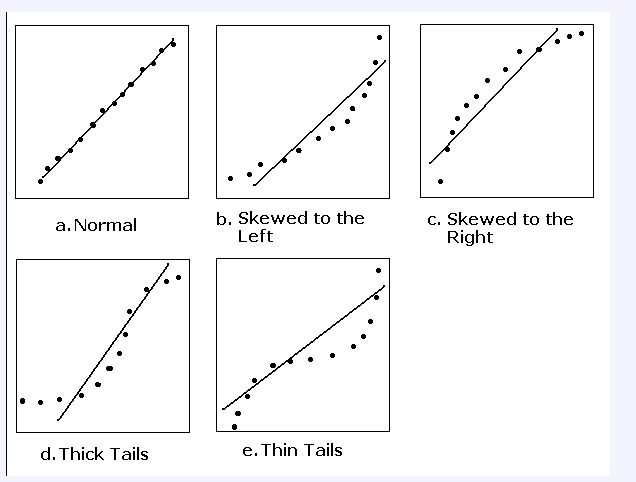

In [18]:
from scipy.stats import wilcoxon
ts_spearmanr_df = alpha.cross_sectional_spearmanr(factors, returns, factor_lag=1)
ic_series = ts_spearmanr_df["SpearmanR"]
stat, p_value = wilcoxon(ic_series, alternative="two-sided")
stat, p_value 

(np.float64(48158.0), np.float64(0.014742582123250915))

#### FACTOR INFORMATION DECAY

This analysis helps quantitative investors:

- Determine how quickly factor signals decay
- Identify optimal rebalancing frequencies
- Understand the time horizon over which a factor has predictive power
- Compare different factors' persistence
- Construct multi-factor portfolios with complementary decay patterns

A stronger factor would show higher absolute IC values with p-values below 0.05, indicating statistically significant predictive power. The decay pattern would reveal how quickly that predictive ability diminishes over time.

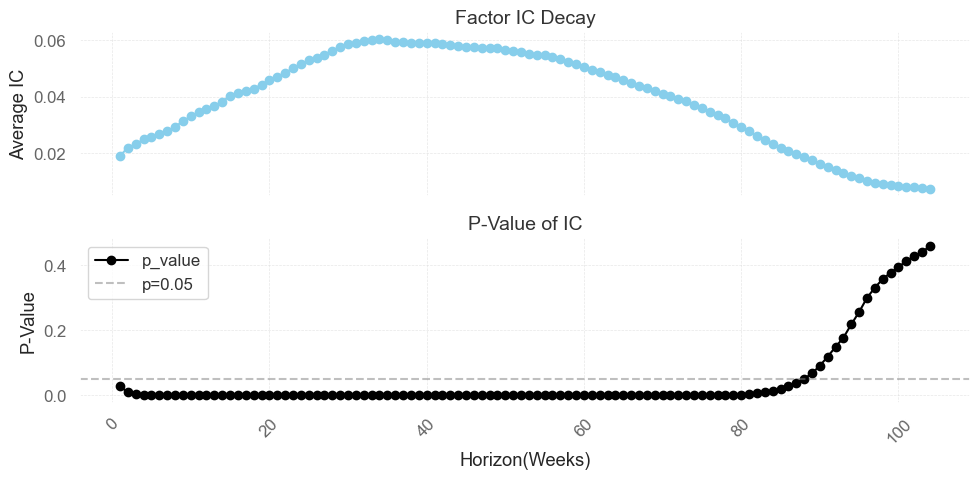

In [ ]:
alpha.plot_factor_decay(factors, returns, 104, "Weeks")

FIND OPTIMAL WINDOW FOR MOMENTUM FACTOR

,79,80,78,76,94,75,77,81,74,87,73,92,83,93,84,88,97,82,98,99
SpearmanR,0.023555,0.023256,0.023113,0.022662,0.022352,0.02233,0.022216,0.022206,0.022138,0.02203,0.021973,0.021955,0.021899,0.021884,0.021873,0.021861,0.021847,0.021761,0.021723,0.021685


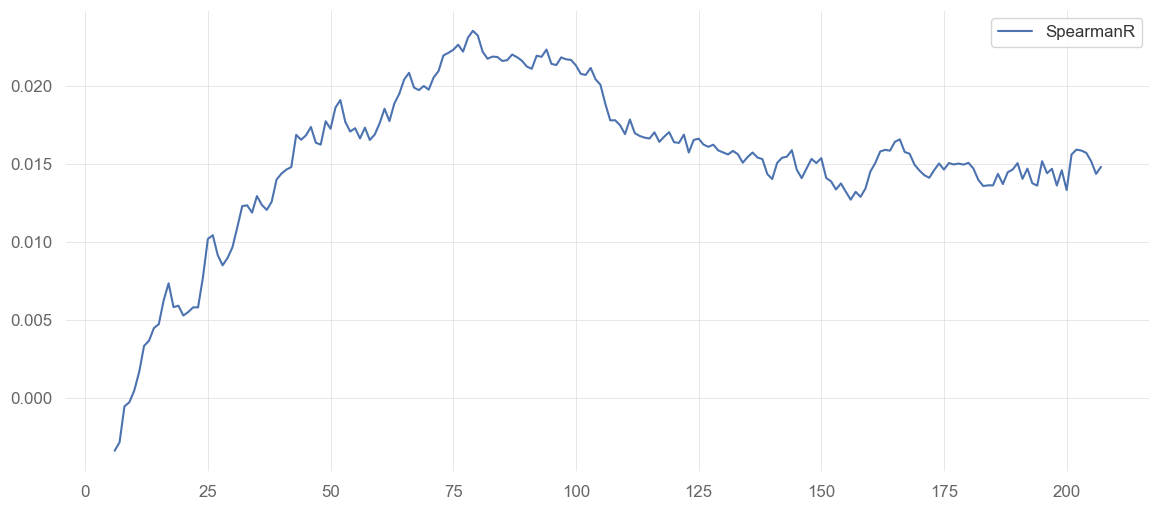

In [ ]:
lag = 1
percentile_windows = range(6,208)

windows_dict = {}
for window in percentile_windows:
    
    raw_factor = returns.rolling(window).mean() / returns.rolling(window).std()
    factor_percentiles = raw_factor.rank(axis =1, pct=True)

    factors_lagged = factor_percentiles.shift(lag)
    ts_spearmanr_df = alpha.cross_sectional_spearmanr(factors_lagged, returns).dropna()
    windows_dict[window] = ts_spearmanr_df["SpearmanR"].mean()

windows_df = pd.DataFrame.from_dict(windows_dict, orient="index", columns = ["SpearmanR"])
windows_df.plot(figsize = (14,6))
windows_df.sort_values(by = ["SpearmanR"], ascending=False).head(20).T

#### QUANTILE HORIZON ANALYSIS

In [ ]:
alpha.fwd_quantile_stats(returns, quantiles, 26)

,Return,Risk-Adjusted Return
Q1,0.091043,0.446657
Q2,0.086747,0.478228
Q3,0.076552,0.469873
Q4,0.073690,0.493628
Q5,0.079537,0.540076
Q6,0.086685,0.521139
Q7,0.091763,0.625335
Q8,0.095507,0.602528
Q9,0.114819,0.742097
Q10,0.126781,0.876392


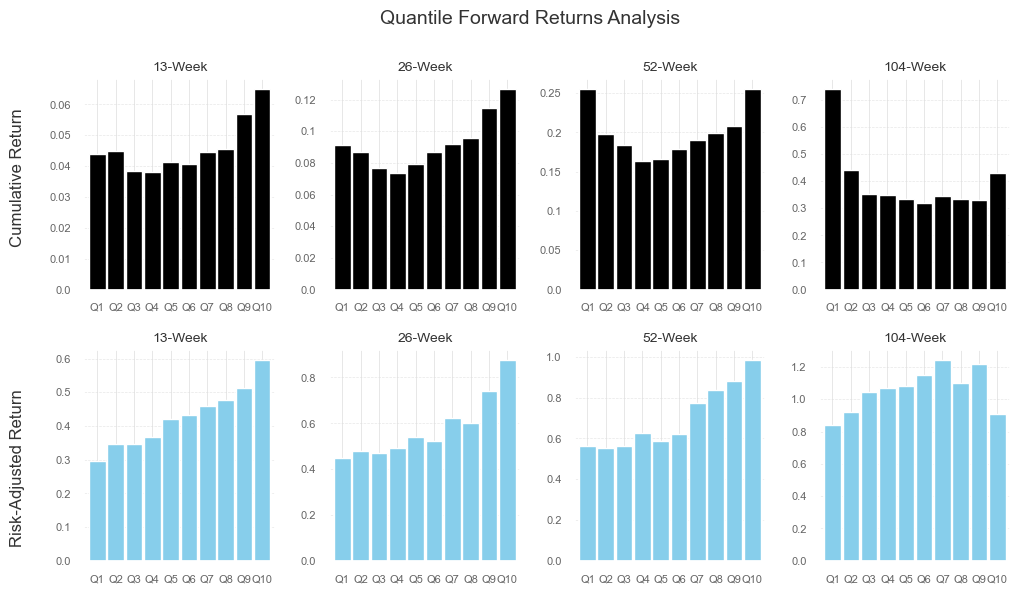

In [ ]:
alpha.plot_forward_returns(returns, quantiles, [13, 26, 52, 104], "Week")

## TURNOVER ANALYSIS

#### FACTOR AUTOCORRELATION

c:\Users\george.georgiev\AppData\Local\miniconda3\envs\AlphalyticsPy\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\george.georgiev\AppData\Local\miniconda3\envs\AlphalyticsPy\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Factor Autocorrelation'}, xlabel='Lags', ylabel='Autocorrelation'>

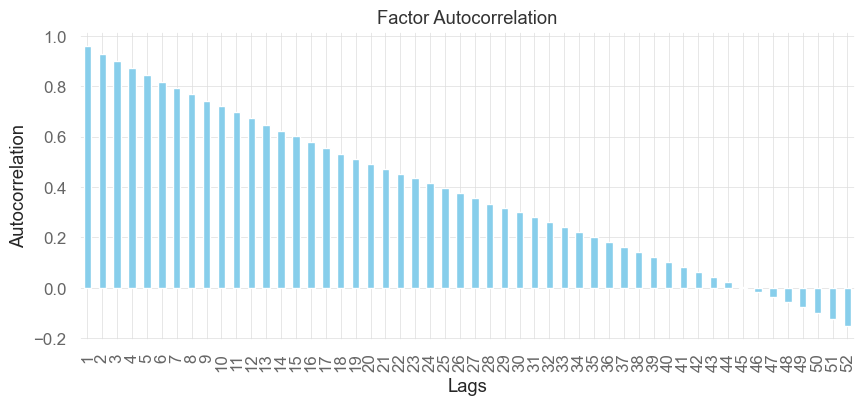

In [ ]:
auto_corrs_ts = alpha.compute_factor_autocorr(factors, 53)
auto_corrs_ts.plot(kind = "bar", title = "Factor Autocorrelation", xlabel="Lags", ylabel="Autocorrelation", figsize=(10,4), color='skyblue')

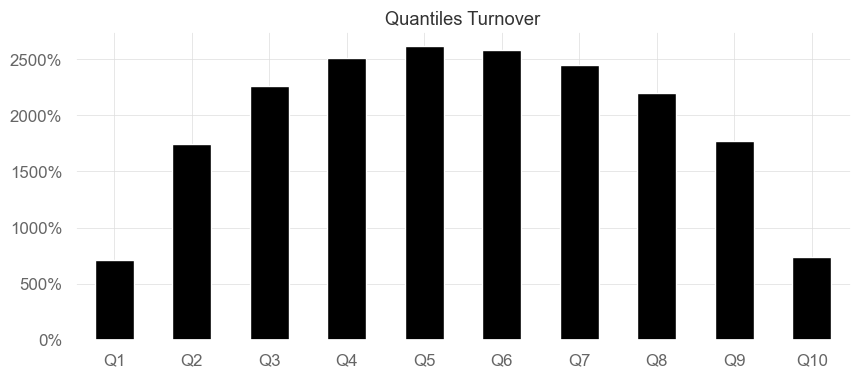

In [ ]:
alpha.plot_quantiles_annual_turnover(quantiles, 52)